# Programming for Data Analysis 2021 - Project

# **Data Set Simulation Based on the Palmer Penguins Data Set**

**Instructions:**

Create a data set by simulating a real-world phenomenon. 
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables
- Investigate the types of variables involved, their likely distributions, and their relationships with each other
- Synthesise/simulate a data set as closely matching their properties as possible
- Detail your research and implement the simulation in a Jupyter notebook - the data set itself can simply be displayed in an output cell within the notebook




## **Table of Contents**

[**1.0 Overview of the Selected Data Set**](#part1.0)<br>
&emsp; [**1.1 Original Research Paper**](#part1.1)<br>
&emsp; [**1.2 Use in Programming and Data Analytics**](#part1.2)<br>
[**2.0 Accessing the Original Data Set**](#part2.0)<br>
[**3.0 Preparing the Original Data Set for Analysis**](#part3.0)<br>
&emsp; [**3.1 Getting an Overview of the Dataset**](#part3.1)<br>
&emsp; [**3.2 Removing Missing Values**](#part3.2)<br>
&emsp;&emsp; [**3.2.1 Missing Value Investigation**](#part3.2.1)<br>
&emsp;&emsp; [**3.2.2 Resolving Missing Values**](#part3.2.2)<br>
&emsp; [**3.3 Removing the "Year" Column**](#part3.3)<br>
[**4.0 Original Data Set Investigation**](#part4.0)<br>
&emsp; [**4.1 Investigating Categorical Attributes**](#part4.1)<br>
&emsp;&emsp; [**4.1.1 Identifying Values for "Species"**](#part4.1.1)<br>
&emsp;&emsp; [**4.1.2 Identifying Values for "Island"**](#part4.1.2)<br>
&emsp;&emsp; [**4.1.3 Identifying Values for "Sex"**](#part4.1.3)<br>
&emsp; [**4.2 Investigating Numerical Attributes**](#part4.2)<br>
&emsp; [**4.3 Subsets of Data by Species**](#part4.3)<br>
&emsp; [**4.4 Subsets of Data by Sex**](#part4.4)<br>
&emsp;&emsp; [**4.4.1 Adelie Subsets**](#part4.4.1)<br>
&emsp;&emsp; [**4.4.2 Gentoo Subsets**](#part4.4.2)<br>
&emsp;&emsp; [**4.4.3 Chinstrap Subsets**](#part4.4.3)<br>
&emsp; [**4.5 Subsets of Data by Island**](#part4.5)<br>
&emsp;&emsp; [**4.5.1 Biscoe Point Subsets**](#part4.5.1)<br>
&emsp;&emsp; [**4.5.2 Dream Subsets**](#part4.5.2)<br>
&emsp;&emsp; [**4.5.3 Torgersen Subsets**](#part4.5.3)<br>
[**5.0 Data Set Simulation**](#part5.0)<br>
&emsp; [**5.1 Simulation for Adelie Penguins**](#part5.1)<br>
&emsp;&emsp; [**5.1.1 Adelie Female**](#part5.1.1)<br>
&emsp;&emsp; [**5.1.2 Adelie Male**](#part5.1.2)<br>
&emsp; [**5.2 Simulation for Gentoo Penguins**](#part5.2)<br>
&emsp;&emsp; [**5.2.1 Gentoo Female**](#part5.2.1)<br>
&emsp;&emsp; [**5.2.2 Gentoo Male**](#part5.2.2)<br>
&emsp; [**5.3 Simulation for Chinstrap Penguins**](#part5.3)<br>
&emsp;&emsp; [**5.3.1 Chinstrap Female**](#part5.3.1)<br>
&emsp;&emsp; [**5.3.2 Chinstrap Male**](#part5.3.2)<br>
&emsp; [**5.4 Combining Simulated Data Sets**](#part5.4)<br>
[**6.0 Data Set Comparison/Validation**](#part6.0)<br>

***

<a id='part1.0'></a>
## **1.0 Overview of the Selected Data Set**
This notebook will be used to investigate the Palmer Penguins dataset and, based on the findings, create a simulated data set matching the properties of the original data. 
I selected the Palmer penguins data set as it contains several attributes that can be used for classifying the three different species. The original research paper and its accompanying data set are easily available as are cleansed and simplified versions of it, for example as a library in Python. 

<br>

### **1.1 Original Research Paper** 

The original research paper published in 2014 contains an investigation of size differences between male and female penguins of the Pygoscelis genus, so-called sexual dimorphism. 

The research was carried out on three different species of penguins nesting on three islands of the Palmer Archipelago in Antarctica. 
The samples were taken between 2007 and 2009 during the egg laying period. 

Penguin species: Adelie, Gentoo, Chinstrap

Islands: Biscoe Point (referred to as Biscoe in the data set), Torgersen and Dream

Samples for the Adelie penguins were taken on all three islands, while samples for Chinstrap penguins were taken on Dream only and samples for Gentoo penguins only on Biscoe Point. 

The sample sizes between the species differ because the population of Chinstrap penguins in general is smaller. Also weather conditions hindered access to penguins. ([[1]](#reference1), p2, p3) 

A number of body measurements were taken as well as blood samples to determine each penguin's sex. ([[1]](#reference1), p3)
- Culmen (beak) length
- Culmen (beak) depth 
- Length of the right flipper
- Body mass
 (Gorman, Williams, Fraser, p2, p3). 

The research concluded that for all three species certain body features could be used to predict the penguin's sex. These were different by species, for example for Adelie penguins, the body mass and culmen length were best suitable to predict sex, while for the Chinstrap species best results could be achieved using culmen length and depth. ([[1]](#reference1), p9).   

<br>

### **1.2 Use in Programming and Data Analytics**

In recent years the data gathered during the research has also been increasingly used for programming for data analysis purposes. The penguins data has been adapted as an alternative to the commonly used Iris Flower data set for data set investigation, data classification and machine learning. [[2]](#reference2), [[3]](#reference3)

***

<a id='part2.0'></a>
## **2.0 Accessing the Original Data Set**

There are several options to get the Palmer penguins data set into a Python program, a selection of these is listed below: 
- Using the `read_csv()` function to obtain the data from a csv version of the data set available online or offline
- Importing the Python library palmerpenguins
- Importing the data set from the seaborn library

For this notebook the data set will be accessed from the palmerpenguins library. To be able to use it, the library first needs to be installed, for example using the command `pip install palmerpenguins`. [[4]](#reference4)

In [1]:
# Importing the penguins dataset
from palmerpenguins import load_penguins

# Importing pandas for working with datasets
import pandas as pd

# Importing NumPy for random number creation
import numpy as np

# Importing pyplot for plotting
import matplotlib.pyplot as plt

# Importing seaborn for pairplot creation
import seaborn as sns

<br>

After importing the library, the dataset can then be defined as a pandas dataframe. 

In [2]:
# Defining the dataset
penguins = load_penguins()

***

<a id='part3.0'></a>
## **3.0 Preparing the Original Data Set for Analysis**

The palmerpenguins library contains a modified version of the original dataset. For easier usage some columns have been removed which were considered not relevant for data analysis on classification, for example identifiers of the original study and dates of egg-laying. [[5]](#reference5)

<br>

<a id='part3.1'></a>
### **3.1 Getting an Overview of the Dataset**

Further cleanup of the data set might be required ahead of starting the analysis. To get a first understanding of the data, the pandas library offers a number of options, for example using the `info()` function which provides a summary of the columns, the number of values and their data type. 

In [3]:
# Overview of the data set
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


<br>

The above output shows that the data set consists of 8 columns and 344 rows. The columns contain three different data types: 

**Object (= categorical values):**
- species
- island
- sex

**Float64 (= numerical float point values):**
- bill-length_mm
- bill-depth_mm
- flipper_lengths_mm
- body_mass_g

**Int64 (= whole numbers):**
- year

The summary also shows that some of columns have missing (null) values. As these can have an impact on the accuracy of data analysis, they will need to be further investigated. 

<br>

For a visual inspection of the data set the `head()` function can be useful which displays the first rows of the data set. The number of rows to be displayed can be set individually by adding a parameter. If left blank, by default the first five rows are shown. 

In [4]:
# Displaying the first ten rows of the data set
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


<br>

<a id='part3.2'></a>
### **3.2 Removing Missing Values**

The output of the `info()` function shows that there are 344 data records in total. Several of the columns contain null values, for example bill_length_mm, billdepth_mm and sex. One of these rows with null values is visible when displaying the first 10 rows (see row index 3). 

<br>

<a id='part3.2.1'></a>
#### **3.2.1 Missing Value Investigation**

To get a better understanding of the full picture, variations of the `isna()` function can be used to determine the number of instances of NaN values and identify affected records. [[6]](#reference6), [[7]](#reference7)

In [5]:
# Determine if there are NaN values in whole data set
penguins.isna().values.any()

True

In [6]:
# Count NaN values in whole data set
penguins.isna().sum().sum()

19

In [7]:
# Display number of NaN values by column
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [8]:
# Display all columns with one or more values = NaN
penguins[penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


<br>

<a id='part3.2.2'></a>
#### **3.2.2 Resolving Missing Values**

Different methods are available for dealing with missing values in a data set, for example, using imputation to substitute missing values with an estimate. For numerical variables this can be achieved by using the column mean, for categorical values by using the most frequent value (mode). [[8]](#reference8), [[9]](#reference9)

<br>

For this project, columns with NaN values will be removed using the `dropna()` function. [[10]](#reference10) 

In [9]:
# Removing all columns with NaN values
penguins = penguins.dropna()

# Resetting the index column
penguins = penguins.reset_index(drop=True)

In [10]:
# Re-run info() to verify new size of dataset and that all values are non-null
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 20.9+ KB


<br>

<a id='part3.3'></a>
### **3.3 Removing the "Year" Column** 

The data set provided in Python contains a "year" column which indicates the year in which the data sample was collected. As this column will not be relevant for the data simulation, the column can be removed using the `drop()` function. [[11]](#reference11) 

In [11]:
# Remove the "year" column
penguins = penguins.drop(['year'], axis=1)

In [12]:
# Display the first five columns to check that the "year" column has been removed
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


***

<a id='part4.0'></a>
## **4.0 Original Data Set Investigation**

The cleansed data set consists of 333 rows and 7 columns. As explored in section 3.1, the columns contain different data types (categorical and numerical) which require different approaches for analysis. 

<br>

<a id='part4.1'></a>
### **4.1 Investigating Categorical Attributes**

To identify the different values of the three categorical variables, the functions for counting and displaying unique records can be used: `nunique()` and `unique()`. [[12]](#reference12), [[13]](#reference13)

In [13]:
# Count unique records of each column
penguins.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

<br>

<a id='part4.1.1'></a>
#### **4.1.1 Identifying Values for "Species"**

In [14]:
# Display unique values for "Species"
species = penguins['species'].unique()
print(species)

['Adelie' 'Gentoo' 'Chinstrap']


In [15]:
# Count instances for "Species"
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

<br>

<a id='part4.1.2'></a>
#### **4.1.2 Identifying Values for "Island"**

In [16]:
# Display unique values for "Island"
islands = penguins['island'].unique()
print(islands)

['Torgersen' 'Biscoe' 'Dream']


In [17]:
# Count instances for "Island"
penguins['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

<br>

<a id='part4.1.3'></a>
#### **4.1.3 Identifying Values for "Sex"**

In [18]:
# Display unique values for "Sex"
sexes = penguins['sex'].unique()
print(sexes)

['male' 'female']


In [19]:
# Count instances for "Sex"
penguins['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

<br>

<a id='part4.2'></a>
### **4.2 Investigating Numerical Attributes**

The `describe()` function provides an overview of descriptive statistics for columns with numerical data. [[14]](#reference14)

In [20]:
# Overview of dataset: Statistical values for the 4 columns with numerical data
penguins.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


The `corr()` function can be used to identify correlations between variables. [[15]](#reference15), [[16]](#reference16)

In [21]:
# Display correlations between variables
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


The seaborn `pairplot()` function creates a number of plots showing the relationship between variables. When setting a hue parameter for the species column, the values are colour-coded by species. [[17]](#reference17)



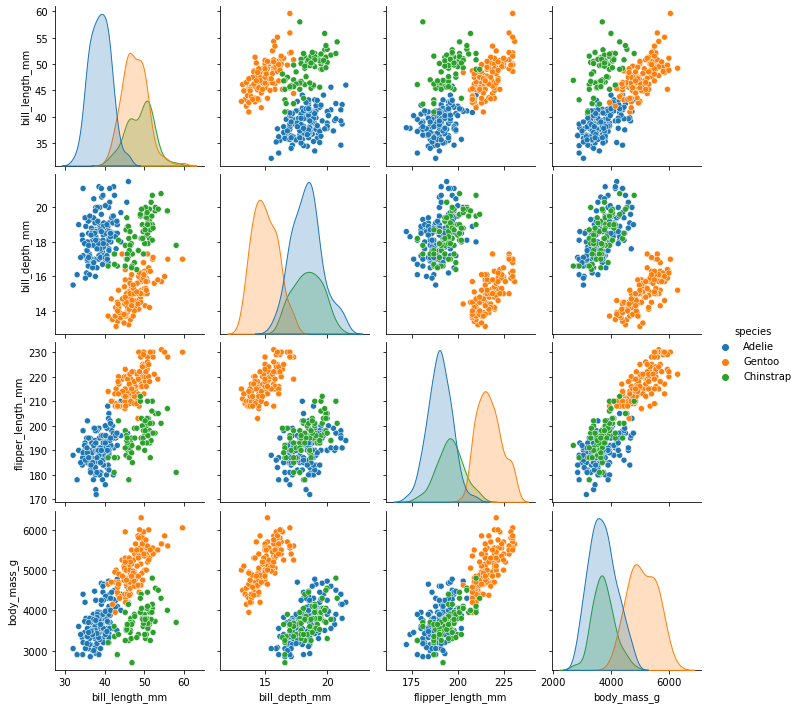

In [22]:
# Plot the data set with a pair plot
sns.pairplot(penguins, hue='species')
plt.show()

The pairplot by species shows that all four numerical attributes follow a normal distribution. It can also be observed that for several combinations of variables, there are distinct differences between the species, with the Gentoo species standing out most. 

<br>

<a id='part4.3'></a>
### **4.3 Subsets of Data by Species**

Running the above functions for the data set as a whole, can provide an overview, however, to be able to investigate and simulate values for the individual penguins species, the data set needs to be split into subsets. 

In [23]:
# Creating subset variables for the species for filtering the results by species

# Filter variable for Adelie species
adelie = penguins[penguins['species'] == 'Adelie']

# Filter variable for Chinstrap species
chinstrap = penguins[penguins['species'] == 'Chinstrap']

# Filter variable for Gentoo species
gentoo = penguins[penguins['species'] == 'Gentoo']

In [24]:
# View correlations for species Adelie
adelie.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.385813,0.332274,0.544276
bill_depth_mm,0.385813,1.000000,0.310897,0.580156
flipper_length_mm,0.332274,0.310897,1.000000,0.464854
body_mass_g,0.544276,0.580156,0.464854,1.000000


In [25]:
# View correlations for species Chinstrap
chinstrap.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.653536,0.471607,0.513638
bill_depth_mm,0.653536,1.000000,0.580143,0.604498
flipper_length_mm,0.471607,0.580143,1.000000,0.641559
body_mass_g,0.513638,0.604498,0.641559,1.000000


In [26]:
# View correlations for species Gentoo
gentoo.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.654023,0.664205,0.666730
bill_depth_mm,0.654023,1.000000,0.710642,0.722967
flipper_length_mm,0.664205,0.710642,1.000000,0.711305
body_mass_g,0.666730,0.722967,0.711305,1.000000


<br>

<a id='part4.4'></a>
### **4.4 Subsets of Data by Sex**

As the original research showed that there are differences between the variables for male and female penguins, the species subsets need to be further split up by sex to be able to determine more precise values. This can also be seen when creating another pairplot, this time using sex as the hue value. 

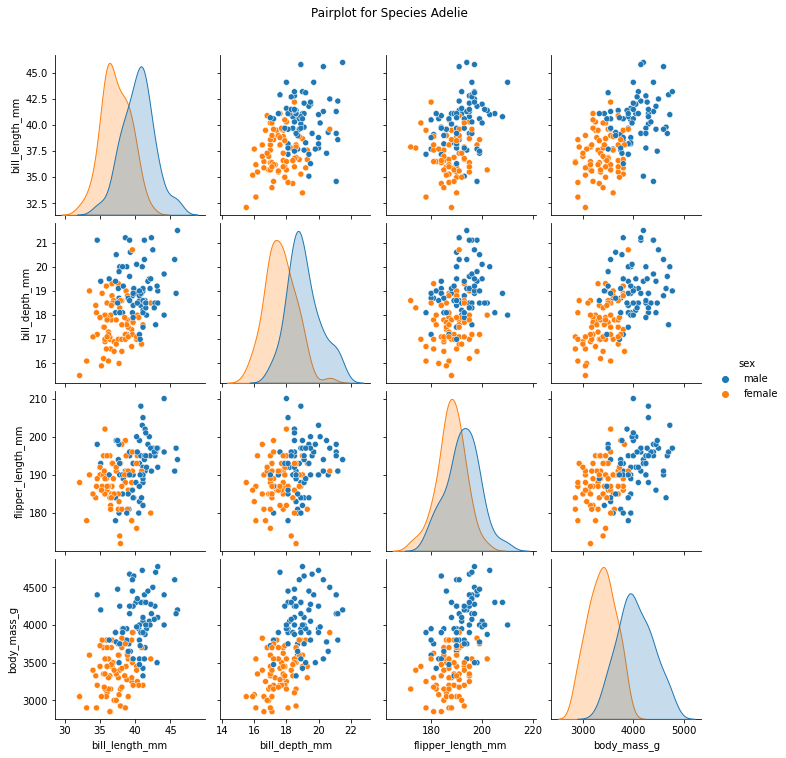

In [27]:
sns.pairplot(adelie, hue='sex')
plt.suptitle('Pairplot for Species Adelie', y=1.05)
plt.show()

<br>

<a id='part4.4.1'></a>
#### **4.4.1 Adelie Subsets**

In [28]:
male_adelie = adelie[adelie['sex'] == 'male']
female_adelie = adelie[adelie['sex'] == 'female']

In [29]:
male_adelie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,73.0,40.390411,2.277131,34.6,39.0,40.6,41.5,46.0
bill_depth_mm,73.0,19.072603,1.018886,17.0,18.5,18.9,19.6,21.5
flipper_length_mm,73.0,192.410959,6.599317,178.0,189.0,193.0,197.0,210.0
body_mass_g,73.0,4043.493151,346.811553,3325.0,3800.0,4000.0,4300.0,4775.0


In [30]:
male_adelie.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.038247,0.313488,0.220370
bill_depth_mm,-0.038247,1.000000,0.185328,0.159558
flipper_length_mm,0.313488,0.185328,1.000000,0.360434
body_mass_g,0.220370,0.159558,0.360434,1.000000


In [31]:
female_adelie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,73.0,37.257534,2.028883,32.1,35.9,37.0,38.8,42.2
bill_depth_mm,73.0,17.621918,0.942993,15.5,17.0,17.6,18.3,20.7
flipper_length_mm,73.0,187.794521,5.595035,172.0,185.0,188.0,191.0,202.0
body_mass_g,73.0,3368.835616,269.380102,2850.0,3175.0,3400.0,3550.0,3900.0


In [32]:
female_adelie.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.160636,-0.037240,0.170095
bill_depth_mm,0.160636,1.000000,0.064044,0.396937
flipper_length_mm,-0.037240,0.064044,1.000000,0.262930
body_mass_g,0.170095,0.396937,0.262930,1.000000


<br>

<a id='part4.4.2'></a>
#### **4.4.2 Gentoo Subsets**

In [33]:
male_gentoo = gentoo[gentoo['sex'] == 'male']
female_gentoo = gentoo[gentoo['sex'] == 'female']

In [34]:
male_gentoo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,61.0,49.473770,2.720594,44.4,48.1,49.5,50.5,59.6
bill_depth_mm,61.0,15.718033,0.741060,14.1,15.2,15.7,16.1,17.3
flipper_length_mm,61.0,221.540984,5.673252,208.0,218.0,221.0,225.0,231.0
body_mass_g,61.0,5484.836066,313.158596,4750.0,5300.0,5500.0,5700.0,6300.0


In [35]:
male_gentoo.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.306767,0.520438,0.391310
bill_depth_mm,0.306767,1.000000,0.470975,0.253457
flipper_length_mm,0.520438,0.470975,1.000000,0.330452
body_mass_g,0.391310,0.253457,0.330452,1.000000


In [36]:
female_gentoo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,58.0,45.563793,2.051247,40.9,43.85,45.50,46.875,50.5
bill_depth_mm,58.0,14.237931,0.540249,13.1,13.80,14.25,14.600,15.5
flipper_length_mm,58.0,212.706897,3.897856,203.0,210.00,212.00,215.000,222.0
body_mass_g,58.0,4679.741379,281.578294,3950.0,4462.50,4700.00,4875.000,5200.0


In [37]:
female_gentoo.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.430444,0.206881,0.271926
bill_depth_mm,0.430444,1.000000,0.307793,0.371881
flipper_length_mm,0.206881,0.307793,1.000000,0.487618
body_mass_g,0.271926,0.371881,0.487618,1.000000


<br>

<a id='part4.4.3'></a>
#### **4.4.3 Chinstrap Subsets**

In [38]:
male_chinstrap = chinstrap[chinstrap['sex'] == 'male']
female_chinstrap = chinstrap[chinstrap['sex'] == 'female']

In [39]:
male_chinstrap.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,34.0,51.094118,1.564558,48.5,50.05,50.95,51.975,55.8
bill_depth_mm,34.0,19.252941,0.761273,17.5,18.80,19.30,19.800,20.8
flipper_length_mm,34.0,199.911765,5.976558,187.0,196.00,200.50,203.000,212.0
body_mass_g,34.0,3938.970588,362.137550,3250.0,3731.25,3950.00,4100.000,4800.0


In [40]:
male_chinstrap.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.446270,0.169109,0.238285
bill_depth_mm,0.446270,1.000000,0.421323,0.345404
flipper_length_mm,0.169109,0.421323,1.000000,0.664588
body_mass_g,0.238285,0.345404,0.664588,1.000000


In [41]:
female_chinstrap.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,34.0,46.573529,3.108669,40.9,45.425,46.30,47.375,58.0
bill_depth_mm,34.0,17.588235,0.781128,16.4,17.000,17.65,18.050,19.4
flipper_length_mm,34.0,191.735294,5.754096,178.0,187.250,192.00,195.750,202.0
body_mass_g,34.0,3527.205882,285.333912,2700.0,3362.500,3550.00,3693.750,4150.0


In [42]:
female_chinstrap.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.256317,0.121909,0.275594
bill_depth_mm,0.256317,1.000000,0.135474,0.391344
flipper_length_mm,0.121909,0.135474,1.000000,0.242150
body_mass_g,0.275594,0.391344,0.242150,1.000000


<br>

<a id='part4.5'></a>
### **4.5 Subsets of Data by Island**

For the Adelie species, data samples have been collected across three different islands. Investigation if there is an impact of island for the Adelie species.  

In [43]:
# Grouping the penguin data set by species, island and sex: 
penguins.groupby(['species','island', 'sex']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island    sex                                                        
Adelie    Biscoe    female       37.359091      17.704545         187.181818   
                    male         40.590909      19.036364         190.409091   
          Dream     female       36.911111      17.618519         187.851852   
                    male         40.071429      18.839286         191.928571   
          Torgersen female       37.554167      17.550000         188.291667   
                    male         40.586957      19.391304         194.913043   
Chinstrap Dream     female       46.573529      17.588235         191.735294   
                    male         51.094118      19.252941         199.911765   
Gentoo    Biscoe    female       45.563793      14.237931         212.706897   
                    male         49.473770      15.718033         221.540984   

                            body_mass_g  
species   island    sex                  
Adelie    Biscoe    female  3369.318182  
                    male    4050.000000  
          Dream     female  3344.444444  
                    male    4045.535714  
          Torgersen female  3395.833333  
                    male    4034.782609  
Chinstrap Dream     female  3527.205882  
                    male    3938.970588  
Gentoo    Biscoe    female  4679.741379  
                    male    5484.836066

In [44]:
male_adelie.groupby('island').agg({'bill_length_mm': ['mean', 'std']})

bill_length_mm          
                    mean       std
island                            
Biscoe         40.590909  2.006634
Dream          40.071429  1.748196
Torgersen      40.586957  3.027496

In [45]:
# Comparing averages for species Adelie
adelie.groupby(['sex', 'island']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
sex    island                                                        
female Biscoe          37.359091      17.704545         187.181818   
       Dream           36.911111      17.618519         187.851852   
       Torgersen       37.554167      17.550000         188.291667   
male   Biscoe          40.590909      19.036364         190.409091   
       Dream           40.071429      18.839286         191.928571   
       Torgersen       40.586957      19.391304         194.913043   

                  body_mass_g  
sex    island                  
female Biscoe     3369.318182  
       Dream      3344.444444  
       Torgersen  3395.833333  
male   Biscoe     4050.000000  
       Dream      4045.535714  
       Torgersen  4034.782609

In [46]:
# Comparing standard deviation for species Adelie
adelie.groupby(['sex', 'island']).std()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
sex    island                                                        
female Biscoe           1.762212       1.091298           6.744567   
       Dream            2.089043       0.897448           5.510156   
       Torgersen        2.207887       0.879723           4.638958   
male   Biscoe           2.006634       0.879689           6.463517   
       Dream            1.748196       1.033276           6.803749   
       Torgersen        3.027496       1.082469           5.915412   

                  body_mass_g  
sex    island                  
female Biscoe      343.470715  
       Dream       212.056475  
       Torgersen   259.144356  
male   Biscoe      355.567956  
       Dream       330.547636  
       Torgersen   372.471714

In [47]:
# Comparing minimum values for species Adelie
adelie.groupby(['sex', 'island']).min()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
sex    island                                                                
female Biscoe     Adelie            34.5           16.0              172.0   
       Dream      Adelie            32.1           15.5              178.0   
       Torgersen  Adelie            33.5           15.9              176.0   
male   Biscoe     Adelie            37.6           17.2              180.0   
       Dream      Adelie            36.3           17.0              178.0   
       Torgersen  Adelie            34.6           17.6              181.0   

                  body_mass_g  
sex    island                  
female Biscoe          2850.0  
       Dream           2900.0  
       Torgersen       2900.0  
male   Biscoe          3550.0  
       Dream           3425.0  
       Torgersen       3325.0

In [48]:
# Comparing maximum values for species Adelie
adelie.groupby(['sex', 'island']).max()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
sex    island                                                                
female Biscoe     Adelie            40.5           20.7              199.0   
       Dream      Adelie            42.2           19.3              202.0   
       Torgersen  Adelie            41.1           19.3              196.0   
male   Biscoe     Adelie            45.6           21.1              203.0   
       Dream      Adelie            44.1           21.2              208.0   
       Torgersen  Adelie            46.0           21.5              210.0   

                  body_mass_g  
sex    island                  
female Biscoe          3900.0  
       Dream           3700.0  
       Torgersen       3800.0  
male   Biscoe          4775.0  
       Dream           4650.0  
       Torgersen       4700.0

<br>

The above results show that for the Adelie species, there are also differences between penguins located on the three different islands.  To take this into account for the simulation, the Adelie subsets are split further. 

<br>

<a id='part4.5.1'></a>
#### **4.5.1 Biscoe Point Subsets**

In [49]:
# Subset of data for Adelie on Biscoe Point
female_adelie_biscoe = female_adelie[female_adelie['island'] == 'Biscoe']
male_adelie_biscoe = male_adelie[male_adelie['island'] == 'Biscoe']

In [50]:
female_adelie_biscoe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,22.0,37.359091,1.762212,34.5,35.75,37.75,38.475,40.5
bill_depth_mm,22.0,17.704545,1.091298,16.0,17.00,17.70,18.250,20.7
flipper_length_mm,22.0,187.181818,6.744567,172.0,184.25,187.00,191.750,199.0
body_mass_g,22.0,3369.318182,343.470715,2850.0,3150.00,3375.00,3693.750,3900.0


In [51]:
male_adelie_biscoe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,22.0,40.590909,2.006634,37.6,39.025,40.8,41.55,45.6
bill_depth_mm,22.0,19.036364,0.879689,17.2,18.600,18.9,19.50,21.1
flipper_length_mm,22.0,190.409091,6.463517,180.0,185.750,191.0,194.75,203.0
body_mass_g,22.0,4050.000000,355.567956,3550.0,3800.000,4000.0,4268.75,4775.0


In [52]:
female_adelie_biscoe.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.108310,-0.000146,0.099711
bill_depth_mm,0.108310,1.000000,-0.051228,0.359601
flipper_length_mm,-0.000146,-0.051228,1.000000,0.417752
body_mass_g,0.099711,0.359601,0.417752,1.000000


In [53]:
male_adelie_biscoe.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.206565,0.466214,0.549775
bill_depth_mm,0.206565,1.000000,0.456207,0.524467
flipper_length_mm,0.466214,0.456207,1.000000,0.616937
body_mass_g,0.549775,0.524467,0.616937,1.000000


<br>

<a id='part4.5.2'></a>
#### **4.5.2 Dream Subsets**

In [54]:
# Subset of data for Adelie on Dream
female_adelie_dream = female_adelie[female_adelie['island'] == 'Dream']
male_adelie_dream = male_adelie[male_adelie['island'] == 'Dream']

In [55]:
female_adelie_dream.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,27.0,36.911111,2.089043,32.1,36.00,36.8,37.85,42.2
bill_depth_mm,27.0,17.618519,0.897448,15.5,17.05,17.8,18.45,19.3
flipper_length_mm,27.0,187.851852,5.510156,178.0,185.00,188.0,191.00,202.0
body_mass_g,27.0,3344.444444,212.056475,2900.0,3212.50,3400.0,3487.50,3700.0


In [56]:
male_adelie_dream.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,28.0,40.071429,1.748196,36.3,39.15,40.25,41.100,44.1
bill_depth_mm,28.0,18.839286,1.033276,17.0,18.10,18.65,19.275,21.2
flipper_length_mm,28.0,191.928571,6.803749,178.0,188.50,190.50,196.000,208.0
body_mass_g,28.0,4045.535714,330.547636,3425.0,3875.00,3987.50,4300.000,4650.0


In [57]:
female_adelie_dream.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.446291,-0.095079,0.385415
bill_depth_mm,0.446291,1.000000,0.102465,0.532589
flipper_length_mm,-0.095079,0.102465,1.000000,0.321025
body_mass_g,0.385415,0.532589,0.321025,1.000000


In [58]:
male_adelie_dream.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.080813,0.255781,0.052007
bill_depth_mm,0.080813,1.000000,0.140551,0.097043
flipper_length_mm,0.255781,0.140551,1.000000,0.312754
body_mass_g,0.052007,0.097043,0.312754,1.000000


<br>

<a id='part4.5.3'></a>
#### **4.5.3 Torgersen Subsets**

In [59]:
# Subset of data for Adelie on Torgersen
female_adelie_torgersen = female_adelie[female_adelie['island'] == 'Torgersen']
male_adelie_torgersen = male_adelie[male_adelie['island'] == 'Torgersen']

In [60]:
female_adelie_torgersen.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,24.0,37.554167,2.207887,33.5,35.85,37.60,39.125,41.1
bill_depth_mm,24.0,17.550000,0.879723,15.9,17.00,17.45,17.925,19.3
flipper_length_mm,24.0,188.291667,4.638958,176.0,186.00,189.00,191.000,196.0
body_mass_g,24.0,3395.833333,259.144356,2900.0,3200.00,3400.00,3606.250,3800.0


In [61]:
male_adelie_torgersen.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,23.0,40.586957,3.027496,34.6,38.85,41.1,42.65,46.0
bill_depth_mm,23.0,19.391304,1.082469,17.6,18.55,19.2,20.15,21.5
flipper_length_mm,23.0,194.913043,5.915412,181.0,192.00,195.0,198.00,210.0
body_mass_g,23.0,4034.782609,372.471714,3325.0,3787.50,4000.0,4275.00,4700.0


In [62]:
female_adelie_torgersen.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.082935,-0.015193,0.042966
bill_depth_mm,-0.082935,1.000000,0.224263,0.350438
flipper_length_mm,-0.015193,0.224263,1.000000,-0.065854
body_mass_g,0.042966,0.350438,-0.065854,1.000000


In [63]:
male_adelie_torgersen.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.296162,0.312882,0.141502
bill_depth_mm,-0.296162,1.000000,-0.103054,-0.022327
flipper_length_mm,0.312882,-0.103054,1.000000,0.236101
body_mass_g,0.141502,-0.022327,0.236101,1.000000


***

<a id='part5.0'></a>
## **5.0 Data Set Simulation**

To create a simulated data set the numpy.random package will be used.  

In [64]:
# Define the random number generator (RNG)
rng = np.random.default_rng(seed=5)

As the distribution of values for all attributes follows a normal distribution, the data will be simulated using the `rng.normal()` function. The simulated data is then combined in a new data frame. 

<br>

<a id='part5.1'></a>
### **5.1 Simulation for Adelie Penguins**

<br>

<a id='part5.1.1'></a>
#### **5.1.1 Adelie Female**

##### **Island Biscoe Point**
Simulation for 33 female Adelie penguins, based on island Biscoe Point. 

<br>

**Simulation Bill Length**

In [65]:
# Extracting mean and standard deviation for bill_length_mm
fa_b_bl_mu = female_adelie_biscoe['bill_length_mm'].mean()
fa_b_bl_std = female_adelie_biscoe['bill_length_mm'].std()

In [66]:
# Simulation of bill_length_mm
sim_female_adelie_biscoe_bill_l = rng.normal(
    loc = fa_b_bl_mu, scale = fa_b_bl_std, size = 33)

In [67]:
# Display bill_length_mm
sim_female_adelie_biscoe_bill_l

array([35.94591807, 35.02529017, 36.92142519, 38.10000437, 39.36104525,
       37.5524168 , 36.38520941, 35.97614189, 38.67853937, 40.2399245 ,
       37.8397672 , 35.18570487, 35.67042488, 40.17866306, 37.71661269,
       34.30670285, 37.21160051, 35.30924064, 36.25015215, 36.4991214 ,
       36.10208183, 38.33426085, 37.24792008, 36.32038833, 38.08095943,
       38.82147153, 34.46373612, 36.90667811, 35.63080657, 37.05395477,
       35.08686228, 37.39555176, 37.29232822])

<br>

**Simulation Bill Depth**

In [68]:
# Extracting mean and standard deviation for bill_depth_mm
fa_b_bd_mu = female_adelie_biscoe['bill_depth_mm'].mean()
fa_b_bd_std = female_adelie_biscoe['bill_depth_mm'].std()

In [69]:
# Simulation of bill_depth_mm
sim_female_adelie_biscoe_bill_d = rng.normal(
    loc = fa_b_bd_mu, scale = fa_b_bd_std, size = 33)

In [70]:
# Display bill_depth_mm
sim_female_adelie_biscoe_bill_d

array([17.37242236, 16.56094564, 17.27218385, 16.5135807 , 16.22560923,
       17.94985361, 16.49391439, 18.98168693, 18.48655594, 15.52433263,
       18.00151907, 16.5022446 , 17.74062072, 17.75216095, 15.53457654,
       17.44981198, 17.42540237, 18.75437445, 16.41523523, 18.5099689 ,
       16.50523897, 17.34300846, 16.78733899, 19.28554262, 18.32463512,
       20.35828962, 18.40506734, 18.62668411, 18.62198077, 17.04255166,
       17.62812357, 19.17822176, 17.2717905 ])

<br>

**Simulation Flipper Length**

In [71]:
# Extracting mean and standard deviation for flipper_length_mm
fa_b_fl_mu = female_adelie_biscoe['flipper_length_mm'].mean()
fa_b_fl_std = female_adelie_biscoe['flipper_length_mm'].std()

In [72]:
# Simulation of flipper_length_mm
sim_female_adelie_biscoe_flipper = rng.normal(
    loc = fa_b_fl_mu, scale = fa_b_fl_std, size = 33)

In [73]:
# Display flipper_length_mm
sim_female_adelie_biscoe_flipper

array([188.45518918, 187.03867514, 191.29071934, 184.7206669 ,
       186.15420329, 188.81657585, 187.87666459, 181.34795196,
       193.2234865 , 178.4241253 , 179.08081447, 178.53196697,
       193.70362704, 184.74967105, 180.63259874, 179.51984633,
       190.02216515, 180.06737517, 178.60220208, 191.32293523,
       179.11054332, 185.00711263, 187.13621452, 184.17822418,
       186.81697786, 196.2112651 , 183.69559119, 178.68833728,
       174.7937646 , 185.80075949, 184.80599734, 188.96974144,
       184.05068965])

<br>

**Simulation Body Mass**

In [74]:
# Extracting mean and standard deviation for body_mass_g
fa_b_bm_mu = female_adelie_biscoe['body_mass_g'].mean()
fa_b_bm_std = female_adelie_biscoe['body_mass_g'].std()

In [75]:
# Simulation of body_mass_g
sim_female_adelie_biscoe_body = rng.normal(
    loc = fa_b_bm_mu, scale = fa_b_bm_std, size = 33)

In [76]:
# Display body_mass_g
sim_female_adelie_biscoe_body

array([3204.91988671, 3121.56734619, 3190.7959212 , 3424.35136319,
       3238.67815866, 3403.81701682, 4022.32030869, 3533.88123562,
       2827.97747577, 3964.73482799, 3488.78085827, 3045.97028725,
       3680.86293582, 3375.38236712, 3158.00863242, 3151.72641827,
       3028.10345456, 3385.84564365, 3736.42541578, 3257.67230504,
       3513.85894492, 4013.54767292, 2952.14186873, 3457.76955853,
       3264.06607146, 3005.49473189, 3016.96971079, 3364.06818277,
       3518.33755786, 3186.73264602, 3387.99974098, 3617.37570471,
       3471.17828533])

<br>

**Data Frame for Simulated Data**

A data frame for the simulated data for the female Adelie penguins on island Biscoe point is created. In alignment with the original data set, the float point numbers for bill_length_mm and bill_depth_mm are rounded to 1 decimal, and the float point numbers for flipper_length_mm and body_mass_g are rounded to full numbers.

[[18]](#reference18), [[19]](#reference19), [[20]](#reference20)

In [77]:
# Data frame of simulated data for female Adelie on island Biscoe
sim_female_adelie_biscoe = pd.DataFrame(
    data = {'species': 'Adelie', 'island': 'Biscoe', 
            'bill_length_mm': np.round(sim_female_adelie_biscoe_bill_l, 1), 
            'bill_depth_mm': np.round(sim_female_adelie_biscoe_bill_d, 1), 
            'flipper_length_mm': np.round(sim_female_adelie_biscoe_flipper, 0), 
            'body_mass_g': np.round(sim_female_adelie_biscoe_body, 0), 
            'sex': 'female'
           }
)

In [78]:
# Display first 5 rows of simulated data
sim_female_adelie_biscoe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,35.9,17.4,188.0,3205.0,female
1,Adelie,Biscoe,35.0,16.6,187.0,3122.0,female
2,Adelie,Biscoe,36.9,17.3,191.0,3191.0,female
3,Adelie,Biscoe,38.1,16.5,185.0,3424.0,female
4,Adelie,Biscoe,39.4,16.2,186.0,3239.0,female


<br>

##### **Island Dream**
Simulation for 42 female Adelie penguins, based on island Dream. 

In [79]:
# Extracting mean and standard deviation for bill_length_mm
fa_d_bl_mu = female_adelie_dream['bill_length_mm'].mean()
fa_d_bl_std = female_adelie_dream['bill_length_mm'].std()

# Extracting mean and standard deviation for bill_depth_mm
fa_d_bd_mu = female_adelie_dream['bill_depth_mm'].mean()
fa_d_bd_std = female_adelie_dream['bill_depth_mm'].std()

# Extracting mean and standard deviation for flipper_length_mm
fa_d_fl_mu = female_adelie_dream['flipper_length_mm'].mean()
fa_d_fl_std = female_adelie_dream['flipper_length_mm'].std()

# Extracting mean and standard deviation for body_mass_g
fa_d_bm_mu = female_adelie_dream['body_mass_g'].mean()
fa_d_bm_std = female_adelie_dream['body_mass_g'].std()

In [80]:
# Simulation of Bill_length_mm
sim_female_adelie_dream_bill_l = rng.normal(
    loc = fa_d_bl_mu, scale = fa_d_bl_std, size = 42)

# Simulation of bill_depth_mm
sim_female_adelie_dream_bill_d = rng.normal(
    loc = fa_d_bd_mu, scale = fa_d_bd_std, size = 42)

# Simulation of flipper_length_mm
sim_female_adelie_dream_flipper = rng.normal(
    loc = fa_d_fl_mu, scale = fa_d_fl_std, size = 42)

# Simulation of body_mass_g
sim_female_adelie_dream_body = rng.normal(
    loc = fa_d_bm_mu, scale = fa_d_bm_std, size = 42)

In [81]:
# Create data frame of simulated data for female Adelie on island Dream
sim_female_adelie_dream = pd.DataFrame(
    data = {'species': 'Adelie', 'island': 'Dream',
            'bill_length_mm': np.round(sim_female_adelie_dream_bill_l, 1),
            'bill_depth_mm': np.round(sim_female_adelie_dream_bill_d, 1),
            'flipper_length_mm': np.round(sim_female_adelie_dream_flipper, 0),
            'body_mass_g': np.round(sim_female_adelie_dream_body, 0), 
            'sex': 'female'
           }
)

In [82]:
# Display first 5 rows of simulated data
sim_female_adelie_dream.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Dream,38.7,15.5,187.0,3541.0,female
1,Adelie,Dream,37.9,17.1,183.0,3627.0,female
2,Adelie,Dream,37.9,17.3,188.0,3515.0,female
3,Adelie,Dream,40.7,18.2,187.0,3273.0,female
4,Adelie,Dream,38.2,17.5,203.0,3333.0,female


<br>

##### **Island Torgersen**
Simulation for 35 female Adelie penguins, based on island Torgersen. 

In [83]:
# Extracting mean and standard deviation for bill_length_mm
fa_t_bl_mu = female_adelie_torgersen['bill_length_mm'].mean()
fa_t_bl_std = female_adelie_torgersen['bill_length_mm'].std()

# Extracting mean and standard deviation for bill_depth_mm
fa_t_bd_mu = female_adelie_torgersen['bill_depth_mm'].mean()
fa_t_bd_std = female_adelie_torgersen['bill_depth_mm'].std()

# Extracting mean and standard deviation for flipper_length_mm
fa_t_fl_mu = female_adelie_torgersen['flipper_length_mm'].mean()
fa_t_fl_std = female_adelie_torgersen['flipper_length_mm'].std()

# Extracting mean and standard deviation for body_mass_g
fa_t_bm_mu = female_adelie_torgersen['body_mass_g'].mean()
fa_t_bm_std = female_adelie_torgersen['body_mass_g'].std()

In [84]:
# Simulation of Bill_length_mm
sim_female_adelie_torgersen_bill_l = rng.normal(
    loc = fa_t_bl_mu, scale = fa_t_bl_std, size = 35)

# Simulation of bill_depth_mm
sim_female_adelie_torgersen_bill_d = rng.normal(
    loc = fa_t_bd_mu, scale = fa_t_bd_std, size = 35)

# Simulation of flipper_length_mm
sim_female_adelie_torgersen_flipper = rng.normal(
    loc = fa_t_fl_mu, scale = fa_t_fl_std, size = 35)

# Simulation of body_mass_g
sim_female_adelie_torgersen_body = rng.normal(
    loc = fa_t_bm_mu, scale = fa_t_bm_std, size = 35)

In [85]:
# Create data frame of simulated data for female Adelie on Torgersen
sim_female_adelie_torgersen = pd.DataFrame(
    data = {'species': 'Adelie', 'island': 'Torgersen',
            'bill_length_mm': np.round(sim_female_adelie_torgersen_bill_l, 1),
            'bill_depth_mm': np.round(sim_female_adelie_torgersen_bill_d, 1),
            'flipper_length_mm': np.round(
                sim_female_adelie_torgersen_flipper, 0),
            'body_mass_g': np.round(sim_female_adelie_torgersen_body, 0),
            'sex': 'female'
           }
)

In [86]:
# Display first 5 rows of simulated data
sim_female_adelie_torgersen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,35.2,16.4,190.0,3530.0,female
1,Adelie,Torgersen,40.2,17.4,195.0,3534.0,female
2,Adelie,Torgersen,37.4,19.2,192.0,3303.0,female
3,Adelie,Torgersen,36.0,17.6,189.0,3338.0,female
4,Adelie,Torgersen,36.1,18.6,188.0,3583.0,female


<br>

<a id='part5.1.2'></a>
#### **5.1.2 Adelie Male**

<br>

##### **Island Biscoe Point**
Simulation for 33 male Adelie penguins, based on island Biscoe Point. 

In [87]:
# Extracting mean and standard deviation for bill_length_mm
ma_b_bl_mu = male_adelie_biscoe['bill_length_mm'].mean()
ma_b_bl_std = male_adelie_biscoe['bill_length_mm'].std()

# Extracting mean and standard deviation for bill_depth_mm
ma_b_bd_mu = male_adelie_biscoe['bill_depth_mm'].mean()
ma_b_bd_std = male_adelie_biscoe['bill_depth_mm'].std()

# Extracting mean and standard deviation for flipper_length_mm
ma_b_fl_mu = male_adelie_biscoe['flipper_length_mm'].mean()
ma_b_fl_std = male_adelie_biscoe['flipper_length_mm'].std()

# Extracting mean and standard deviation for body_mass_g
ma_b_bm_mu = male_adelie_biscoe['body_mass_g'].mean()
ma_b_bm_std = male_adelie_biscoe['body_mass_g'].std()

In [88]:
# Simulation of Bill_length_mm
sim_male_adelie_biscoe_bill_l = rng.normal(
    loc = ma_b_bl_mu, scale = ma_b_bl_std, size = 33)

# Simulation of bill_depth_mm
sim_male_adelie_biscoe_bill_d = rng.normal(
    loc = ma_b_bd_mu, scale = ma_b_bd_std, size = 33)

# Simulation of flipper_length_mm
sim_male_adelie_biscoe_flipper = rng.normal(
    loc = ma_b_fl_mu, scale = ma_b_fl_std, size = 33)

# Simulation of body_mass_g
sim_male_adelie_biscoe_body = rng.normal(
    loc = ma_b_bm_mu, scale = ma_b_bm_std, size = 33)

In [89]:
# Create data frame of simulated data for male Adelie on island Biscoe
sim_male_adelie_biscoe = pd.DataFrame(
    data = {'species': 'Adelie','island': 'Biscoe',
            'bill_length_mm': np.round(sim_male_adelie_biscoe_bill_l, 1),
            'bill_depth_mm': np.round(sim_male_adelie_biscoe_bill_d, 1),
            'flipper_length_mm': np.round(sim_male_adelie_biscoe_flipper, 0),
            'body_mass_g': np.round(sim_male_adelie_biscoe_body, 0),
            'sex': 'male'
           }
)

In [90]:
# Display first 5 rows of simulated data
sim_male_adelie_biscoe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.6,20.3,189.0,4057.0,male
1,Adelie,Biscoe,41.0,19.8,192.0,3346.0,male
2,Adelie,Biscoe,44.6,19.5,193.0,3389.0,male
3,Adelie,Biscoe,42.3,19.6,184.0,4310.0,male
4,Adelie,Biscoe,43.2,18.6,193.0,4171.0,male


<br>

##### **Island Dream**
Simulation for 42 male Adelie penguins, based on island Dream. 

In [91]:
# Extracting mean and standard deviation for bill_length_mm
ma_d_bl_mu = male_adelie_dream['bill_length_mm'].mean()
ma_d_bl_std = male_adelie_dream['bill_length_mm'].std()

# Extracting mean and standard deviation for bill_depth_mm
ma_d_bd_mu = male_adelie_dream['bill_depth_mm'].mean()
ma_d_bd_std = male_adelie_dream['bill_depth_mm'].std()

# Extracting mean and standard deviation for flipper_length_mm
ma_d_fl_mu = male_adelie_dream['flipper_length_mm'].mean()
ma_d_fl_std = male_adelie_dream['flipper_length_mm'].std()

# Extracting mean and standard deviation for body_mass_g
ma_d_bm_mu = male_adelie_dream['body_mass_g'].mean()
ma_d_bm_std = male_adelie_dream['body_mass_g'].std()

In [92]:
# Simulation of Bill_length_mm
sim_male_adelie_dream_bill_l = rng.normal(
    loc = ma_d_bl_mu, scale = ma_d_bl_std, size = 42)

# Simulation of bill_depth_mm
sim_male_adelie_dream_bill_d = rng.normal(
    loc = ma_d_bd_mu, scale = ma_d_bd_std, size = 42)

# Simulation of flipper_length_mm
sim_male_adelie_dream_flipper = rng.normal(
    loc = ma_d_fl_mu, scale = ma_d_fl_std, size = 42)

# Simulation of body_mass_g
sim_male_adelie_dream_body = rng.normal(
    loc = ma_d_bm_mu, scale = ma_d_bm_std, size = 42)

In [93]:
# Create data frame of simulated data for male Adelie on island Dream
sim_male_adelie_dream = pd.DataFrame(
    data = {'species': 'Adelie','island': 'Dream',
            'bill_length_mm': np.round(sim_male_adelie_dream_bill_l, 1),
            'bill_depth_mm': np.round(sim_male_adelie_dream_bill_d, 1),
            'flipper_length_mm': np.round(sim_male_adelie_dream_flipper, 0),
            'body_mass_g': np.round(sim_male_adelie_dream_body, 0),
            'sex': 'male'
           }
)

In [94]:
# Display first 5 rows of simulated data
sim_male_adelie_dream.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Dream,39.6,19.1,192.0,3849.0,male
1,Adelie,Dream,40.0,21.4,197.0,3620.0,male
2,Adelie,Dream,40.3,20.1,198.0,4461.0,male
3,Adelie,Dream,42.8,19.2,183.0,3750.0,male
4,Adelie,Dream,37.5,19.0,193.0,4639.0,male


<br>

##### **Island Torgersen**
Simulation for 35 male Adelie penguins, based on island Torgersen. 

In [95]:
# Extracting mean and standard deviation for bill_length_mm
ma_t_bl_mu = male_adelie_torgersen['bill_length_mm'].mean()
ma_t_bl_std = male_adelie_torgersen['bill_length_mm'].std()

# Extracting mean and standard deviation for bill_depth_mm
ma_t_bd_mu = male_adelie_torgersen['bill_depth_mm'].mean()
ma_t_bd_std = male_adelie_torgersen['bill_depth_mm'].std()

# Extracting mean and standard deviation for flipper_length_mm
ma_t_fl_mu = male_adelie_torgersen['flipper_length_mm'].mean()
ma_t_fl_std = male_adelie_torgersen['flipper_length_mm'].std()

# Extracting mean and standard deviation for body_mass_g
ma_t_bm_mu = male_adelie_torgersen['body_mass_g'].mean()
ma_t_bm_std = male_adelie_torgersen['body_mass_g'].std()

In [96]:
# Simulation of Bill_length_mm
sim_male_adelie_torgersen_bill_l = rng.normal(
    loc = ma_t_bl_mu, scale = ma_t_bl_std, size = 35)

# Simulation of bill_depth_mm
sim_male_adelie_torgersen_bill_d = rng.normal(
    loc = ma_t_bd_mu, scale = ma_t_bd_std, size = 35)

# Simulation of flipper_length_mm
sim_male_adelie_torgersen_flipper = rng.normal(
    loc = ma_t_fl_mu, scale = ma_t_fl_std, size = 35)

# Simulation of body_mass_g
sim_male_adelie_torgersen_body = rng.normal(
    loc = ma_t_bm_mu, scale = ma_t_bm_std, size = 35)

In [97]:
# Create data frame of simulated data for male Adelie on Torgersen
sim_male_adelie_torgersen = pd.DataFrame(
    data = {'species': 'Adelie','island': 'Torgersen',
            'bill_length_mm': np.round(sim_male_adelie_torgersen_bill_l, 1),
            'bill_depth_mm': np.round(sim_male_adelie_torgersen_bill_d, 1),
            'flipper_length_mm': np.round(
                sim_male_adelie_torgersen_flipper, 0),
            'body_mass_g': np.round(sim_male_adelie_torgersen_body, 0),
            'sex': 'male'
           }
)

In [98]:
# Display first 5 rows of simulated data
sim_male_adelie_torgersen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,41.5,18.1,200.0,4202.0,male
1,Adelie,Torgersen,39.6,16.4,195.0,3327.0,male
2,Adelie,Torgersen,41.1,18.4,194.0,4191.0,male
3,Adelie,Torgersen,40.9,17.9,197.0,4179.0,male
4,Adelie,Torgersen,39.6,18.8,201.0,3947.0,male


<br>

<a id='part5.2'></a>
### **5.2 Simulation for Gentoo Penguins**

<br>

<a id='part5.2.1'></a>
#### **5.2.1 Gentoo Female**

Simulation for 90 female Gentoo penguins, based on Island Biscoe Point. 

**Simulation Bill Length**

In [99]:
# Extracting mean and standard deviation for bill_length_mm
fg_bl_mu = female_gentoo['bill_length_mm'].mean()
fg_bl_std = female_gentoo['bill_length_mm'].std()

# Extracting mean and standard deviation for bill_depth_mm
fg_bd_mu = female_gentoo['bill_depth_mm'].mean()
fg_bd_std = female_gentoo['bill_depth_mm'].std()

# Extracting mean and standard deviation for flipper_length_mm
fg_fl_mu = female_gentoo['flipper_length_mm'].mean()
fg_fl_std = female_gentoo['flipper_length_mm'].std()

# Extracting mean and standard deviation for body_mass_g
fg_bm_mu = female_gentoo['body_mass_g'].mean()
fg_bm_std = female_gentoo['body_mass_g'].std()

In [100]:
# Simulation of Bill_length_mm
sim_female_gentoo_bill_l = rng.normal(
    loc = fg_bl_mu, scale = fg_bl_std, size = 90)

#Simulation of bill_depth_mm
sim_female_gentoo_bill_d = rng.normal(
    loc = fg_bd_mu, scale = fg_bd_std, size = 90)

# Simulation of flipper_length_mm
sim_female_gentoo_flipper = rng.normal(
    loc = fg_fl_mu, scale = fg_fl_std, size = 90)

# Simulation of body_mass_g
sim_female_gentoo_body = rng.normal(
    loc = fg_bm_mu, scale = fg_bm_std, size = 90)

<br>

**Data Frame for Simulated Data**

In [101]:
# Create data frame of simulated data for female Gentoo penguins
sim_female_gentoo = pd.DataFrame(
    data = {'species': 'Gentoo', 'island': 'Biscoe', 
            'bill_length_mm': np.round(sim_female_gentoo_bill_l, 1), 
            'bill_depth_mm': np.round(sim_female_gentoo_bill_d, 1), 
            'flipper_length_mm': np.round(sim_female_gentoo_flipper,0), 
            'body_mass_g': np.round(sim_female_gentoo_body, 0), 
            'sex': 'female'
           }
)

In [102]:
# Display first 5 rows of simulated data
sim_female_gentoo.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,42.5,13.9,216.0,4552.0,female
1,Gentoo,Biscoe,42.8,14.3,208.0,4677.0,female
2,Gentoo,Biscoe,43.2,14.5,211.0,5205.0,female
3,Gentoo,Biscoe,45.3,14.8,211.0,4875.0,female
4,Gentoo,Biscoe,46.3,14.5,217.0,4698.0,female


<br>

<a id='part5.2.2'></a>
#### **5.2.2 Gentoo Male**

Simulation for 90 male Gentoo penguins, based on Island Biscoe Point. 

<br>

**Simulation Bill Length**

In [103]:
# Extracting mean and standard deviation for bill_length_mm
mg_bl_mu = male_gentoo['bill_length_mm'].mean()
mg_bl_std = male_gentoo['bill_length_mm'].std()

# Extracting mean and standard deviation for bill_depth_mm
mg_bd_mu = male_gentoo['bill_depth_mm'].mean()
mg_bd_std = male_gentoo['bill_depth_mm'].std()

# Extracting mean and standard deviation for flipper_length_mm
mg_fl_mu = male_gentoo['flipper_length_mm'].mean()
mg_fl_std = male_gentoo['flipper_length_mm'].std()

# Extracting mean and standard deviation for body_mass_g
mg_bm_mu = male_gentoo['body_mass_g'].mean()
mg_bm_std = male_gentoo['body_mass_g'].std()

In [104]:
# Simulation of Bill_length_mm
sim_male_gentoo_bill_l = rng.normal(
    loc = mg_bl_mu, scale = mg_bl_std, size = 90)

#Simulation of bill_depth_mm
sim_male_gentoo_bill_d = rng.normal(
    loc = mg_bd_mu, scale = mg_bd_std, size = 90)

# Simulation of flipper_length_mm
sim_male_gentoo_flipper = rng.normal(
    loc = mg_fl_mu, scale = mg_fl_std, size = 90)

# Simulation of body_mass_g
sim_male_gentoo_body = rng.normal(
    loc = mg_bm_mu, scale = mg_bm_std, size = 90)

In [105]:
# Create data frame of simulated data for male Gentoo penguins
sim_male_gentoo = pd.DataFrame(
    data = {'species': 'Gentoo', 'island': 'Biscoe', 
            'bill_length_mm': np.round(sim_male_gentoo_bill_l, 1), 
            'bill_depth_mm': np.round(sim_male_gentoo_bill_d, 1), 
            'flipper_length_mm': np.round(sim_male_gentoo_flipper,0), 
            'body_mass_g': np.round(sim_male_gentoo_body, 0), 
            'sex': 'male'
           }
)

In [106]:
# Display first 5 rows of simulated data
sim_male_gentoo.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,50.3,16.4,224.0,4798.0,male
1,Gentoo,Biscoe,51.1,15.9,225.0,5539.0,male
2,Gentoo,Biscoe,52.8,16.1,223.0,5594.0,male
3,Gentoo,Biscoe,48.7,16.8,216.0,5588.0,male
4,Gentoo,Biscoe,53.2,15.9,228.0,5479.0,male


<br>

<a id='part5.3'></a>
### **5.3 Simulation for Chinstrap Penguins**

<br>

<a id='part5.3.1'></a>
#### **5.3.1 Chinstrap Female**

Simulation for 50 female Chinstrap penguins, based on island Dream. 

In [107]:
# Extracting mean and standard deviation for bill_length_mm
fc_bl_mu = female_chinstrap['bill_length_mm'].mean()
fc_bl_std = female_chinstrap['bill_length_mm'].std()

# Extracting mean and standard deviation for bill_depth_mm
fc_bd_mu = female_chinstrap['bill_depth_mm'].mean()
fc_bd_std = female_chinstrap['bill_depth_mm'].std()

# Extracting mean and standard deviation for flipper_length_mm
fc_fl_mu = female_chinstrap['flipper_length_mm'].mean()
fc_fl_std = female_chinstrap['flipper_length_mm'].std()

# Extracting mean and standard deviation for body_mass_g
fc_bm_mu = female_chinstrap['body_mass_g'].mean()
fc_bm_std = female_chinstrap['body_mass_g'].std()

In [108]:
# Simulation of Bill_length_mm
sim_female_chinstrap_bill_l = rng.normal(
    loc = fc_bl_mu, scale = fc_bl_std, size = 50)

# Simulation of bill_depth_mm
sim_female_chinstrap_bill_d = rng.normal(
    loc = fc_bd_mu, scale = fc_bd_std, size = 50)

# Simulation of flipper_length_mm
sim_female_chinstrap_flipper = rng.normal(
    loc = fc_fl_mu, scale = fc_fl_std, size = 50)

# Simulation of body_mass_g
sim_female_chinstrap_body = rng.normal(
    loc = fc_bm_mu, scale = fc_bm_std, size = 50)

In [109]:
# Create data frame of simulated data for female Chinstrap penguins
sim_female_chinstrap = pd.DataFrame(
    data = {'species': 'Chinstrap', 'island': 'Dream', 
            'bill_length_mm': np.round(sim_female_chinstrap_bill_l, 1), 
            'bill_depth_mm': np.round(sim_female_chinstrap_bill_d, 1), 
            'flipper_length_mm': np.round(sim_female_chinstrap_flipper,0), 
            'body_mass_g': np.round(sim_female_chinstrap_body, 0), 
            'sex': 'female'
           }
)

In [110]:
# Display first 5 rows of simulated data
sim_female_chinstrap.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,46.6,19.8,186.0,3497.0,female
1,Chinstrap,Dream,47.6,17.1,187.0,3905.0,female
2,Chinstrap,Dream,48.0,18.2,193.0,3633.0,female
3,Chinstrap,Dream,47.3,18.1,199.0,3743.0,female
4,Chinstrap,Dream,44.0,17.7,188.0,3399.0,female


<br>

<a id='part5.3.2'></a>
#### **5.3.2 Chinstrap Male**

Simulation for 50 male Chinstrap penguins, based on island Dream. 

In [111]:
# Extracting mean and standard deviation for bill_length_mm
mc_bl_mu = male_chinstrap['bill_length_mm'].mean()
mc_bl_std = male_chinstrap['bill_length_mm'].std()

# Extracting mean and standard deviation for bill_depth_mm
mc_bd_mu = male_chinstrap['bill_depth_mm'].mean()
mc_bd_std = male_chinstrap['bill_depth_mm'].std()

# Extracting mean and standard deviation for flipper_length_mm
mc_fl_mu = male_chinstrap['flipper_length_mm'].mean()
mc_fl_std = male_chinstrap['flipper_length_mm'].std()

# Extracting mean and standard deviation for body_mass_g
mc_bm_mu = male_chinstrap['body_mass_g'].mean()
mc_bm_std = male_chinstrap['body_mass_g'].std()

In [112]:
# Simulation of Bill_length_mm
sim_male_chinstrap_bill_l = rng.normal(
    loc = mc_bl_mu, scale = mc_bl_std, size = 50)

# Simulation of bill_depth_mm
sim_male_chinstrap_bill_d = rng.normal(
    loc = mc_bd_mu, scale = mc_bd_std, size = 50)

# Simulation of flipper_length_mm
sim_male_chinstrap_flipper = rng.normal(
    loc = mc_fl_mu, scale = mc_fl_std, size = 50)

# Simulation of body_mass_g
sim_male_chinstrap_body = rng.normal(
    loc = mc_bm_mu, scale = mc_bm_std, size = 50)

In [113]:
# Create data frame of simulated data for male Chinstrap penguins
sim_male_chinstrap = pd.DataFrame(
    data = {'species': 'Chinstrap', 'island': 'Dream', 
            'bill_length_mm': np.round(sim_male_chinstrap_bill_l, 1), 
            'bill_depth_mm': np.round(sim_male_chinstrap_bill_d, 1), 
            'flipper_length_mm': np.round(sim_male_chinstrap_flipper,0), 
            'body_mass_g': np.round(sim_male_chinstrap_body, 0), 
            'sex': 'male'
           }
)

In [114]:
# Display first 5 rows of simulated data
sim_male_chinstrap.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,53.2,18.4,197.0,4596.0,male
1,Chinstrap,Dream,51.1,20.0,195.0,3961.0,male
2,Chinstrap,Dream,48.8,19.7,202.0,3746.0,male
3,Chinstrap,Dream,50.3,19.5,200.0,3530.0,male
4,Chinstrap,Dream,51.3,19.4,206.0,3747.0,male


<br>

<a id='part5.4'></a>
### **5.4 Combining Simulated Data Sets**

The subsets of simulated data created above can be combined using the `append()` function.

- sim_female_adelie_biscoe
- sim_female_adelie_dream
- sim_female_adelie_torgersen
- sim_male_adelie_biscoe
- sim_male_adelie_dream
- sim_male_adelie_torgersen
- sim_female_gentoo
- sim_male_gentoo
- sim_female_chinstrap
- sim_male_chinstrap

[[21]](#reference21), [[22]](#reference22)

In [115]:
# Create a blank pandas data frame with the required columns
sim_penguins = pd.DataFrame(
    columns = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 
               'flipper_length_mm', 'body_mass_g', 'sex'])

In [116]:
# View empty data frame
sim_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [117]:
# Append the simulated data subsets to the data frame
sim_penguins = sim_penguins.append([sim_female_adelie_biscoe,
    sim_female_adelie_dream, sim_female_adelie_torgersen, 
    sim_male_adelie_biscoe, sim_male_adelie_dream, sim_male_adelie_torgersen,
    sim_female_gentoo, sim_male_gentoo, sim_female_chinstrap, 
    sim_male_chinstrap], ignore_index=True)

<br>

Using the `info()` function to check that the new data set contains all 7 columns and 500 rows as expected. 

In [118]:
# Overview of the simulated data set
sim_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            500 non-null    object 
 1   island             500 non-null    object 
 2   bill_length_mm     500 non-null    float64
 3   bill_depth_mm      500 non-null    float64
 4   flipper_length_mm  500 non-null    float64
 5   body_mass_g        500 non-null    float64
 6   sex                500 non-null    object 
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [119]:
# Display the full simulated data frame
pd.set_option('display.max_rows', 500)
sim_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,35.9,17.4,188.0,3205.0,female
1,Adelie,Biscoe,35.0,16.6,187.0,3122.0,female
2,Adelie,Biscoe,36.9,17.3,191.0,3191.0,female
3,Adelie,Biscoe,38.1,16.5,185.0,3424.0,female
4,Adelie,Biscoe,39.4,16.2,186.0,3239.0,female
5,Adelie,Biscoe,37.6,17.9,189.0,3404.0,female
6,Adelie,Biscoe,36.4,16.5,188.0,4022.0,female
7,Adelie,Biscoe,36.0,19.0,181.0,3534.0,female
8,Adelie,Biscoe,38.7,18.5,193.0,2828.0,female
9,Adelie,Biscoe,40.2,15.5,178.0,3965.0,female


<a id='part6.0'></a>
## **6.0 Data Set Comparison/Validation**

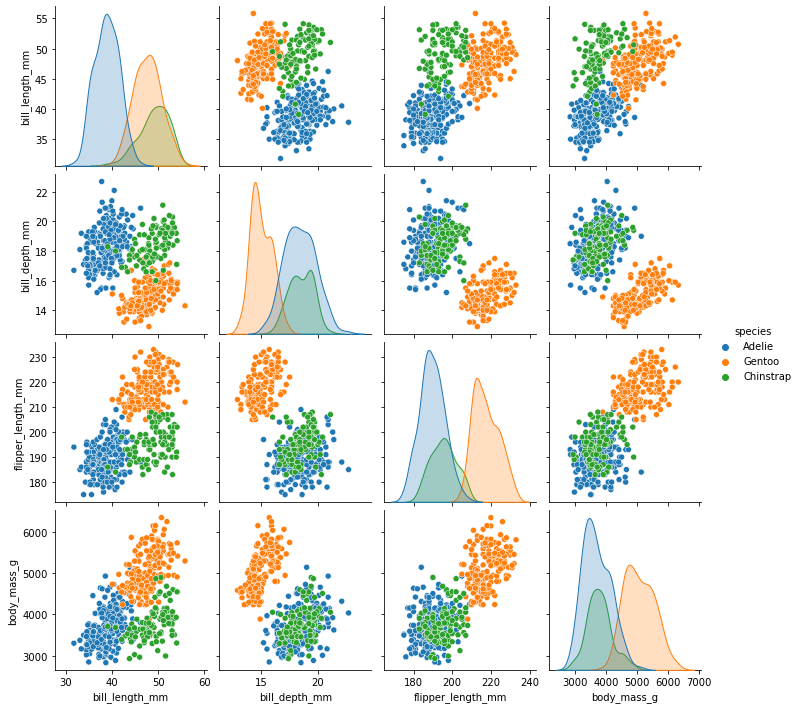

In [120]:
sns.pairplot(sim_penguins, hue = 'species')

In [121]:
female_gentoo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,58.0,45.563793,2.051247,40.9,43.85,45.50,46.875,50.5
bill_depth_mm,58.0,14.237931,0.540249,13.1,13.80,14.25,14.600,15.5
flipper_length_mm,58.0,212.706897,3.897856,203.0,210.00,212.00,215.000,222.0
body_mass_g,58.0,4679.741379,281.578294,3950.0,4462.50,4700.00,4875.000,5200.0


In [122]:
sim_female_gentoo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,90.0,45.757778,2.103020,40.1,44.300,45.9,47.40,50.1
bill_depth_mm,90.0,14.298889,0.471072,12.9,14.025,14.3,14.60,15.2
flipper_length_mm,90.0,213.188889,3.540756,205.0,211.000,213.0,216.00,222.0
body_mass_g,90.0,4692.200000,263.211719,3884.0,4540.250,4678.5,4883.25,5211.0


In [123]:
female_chinstrap.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,34.0,46.573529,3.108669,40.9,45.425,46.30,47.375,58.0
bill_depth_mm,34.0,17.588235,0.781128,16.4,17.000,17.65,18.050,19.4
flipper_length_mm,34.0,191.735294,5.754096,178.0,187.250,192.00,195.750,202.0
body_mass_g,34.0,3527.205882,285.333912,2700.0,3362.500,3550.00,3693.750,4150.0


In [124]:
sim_female_chinstrap.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,50.0,47.000,2.965723,39.1,44.95,47.15,48.850,54.0
bill_depth_mm,50.0,17.752,0.743198,16.0,17.30,17.70,18.175,19.8
flipper_length_mm,50.0,192.060,5.399962,183.0,188.00,192.00,195.750,206.0
body_mass_g,50.0,3564.580,268.202717,2926.0,3434.00,3539.00,3733.750,4081.0


In [125]:
female_adelie_biscoe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,22.0,37.359091,1.762212,34.5,35.75,37.75,38.475,40.5
bill_depth_mm,22.0,17.704545,1.091298,16.0,17.00,17.70,18.250,20.7
flipper_length_mm,22.0,187.181818,6.744567,172.0,184.25,187.00,191.750,199.0
body_mass_g,22.0,3369.318182,343.470715,2850.0,3150.00,3375.00,3693.750,3900.0


In [126]:
sim_male_adelie_biscoe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,33.0,41.003030,1.897776,37.5,39.4,41.0,42.3,44.6
bill_depth_mm,33.0,19.106061,0.888798,16.4,18.6,19.4,19.6,20.8
flipper_length_mm,33.0,189.454545,6.801153,177.0,184.0,190.0,193.0,203.0
body_mass_g,33.0,3957.848485,408.388917,2882.0,3823.0,3977.0,4182.0,4657.0


In [127]:
sim_male_chinstrap.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,50.0,51.136,1.684474,48.0,49.600,51.20,52.55,54.1
bill_depth_mm,50.0,19.252,0.702253,17.2,18.925,19.35,19.60,21.1
flipper_length_mm,50.0,198.840,5.654545,183.0,195.000,199.00,202.75,208.0
body_mass_g,50.0,3988.220,394.776573,2989.0,3754.500,3939.50,4144.75,4893.0


In [128]:
sim_female_adelie_dream.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,42.0,37.211905,2.132353,33.1,35.45,37.2,38.775,41.0
bill_depth_mm,42.0,17.757143,1.011192,15.5,17.10,17.6,18.375,20.0
flipper_length_mm,42.0,187.571429,5.360847,175.0,185.25,187.0,190.750,203.0
body_mass_g,42.0,3341.428571,191.974991,2844.0,3231.00,3342.0,3499.500,3712.0


In [129]:
female_adelie_dream.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,27.0,36.911111,2.089043,32.1,36.00,36.8,37.85,42.2
bill_depth_mm,27.0,17.618519,0.897448,15.5,17.05,17.8,18.45,19.3
flipper_length_mm,27.0,187.851852,5.510156,178.0,185.00,188.0,191.00,202.0
body_mass_g,27.0,3344.444444,212.056475,2900.0,3212.50,3400.0,3487.50,3700.0


In [130]:
male_chinstrap.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,34.0,51.094118,1.564558,48.5,50.05,50.95,51.975,55.8
bill_depth_mm,34.0,19.252941,0.761273,17.5,18.80,19.30,19.800,20.8
flipper_length_mm,34.0,199.911765,5.976558,187.0,196.00,200.50,203.000,212.0
body_mass_g,34.0,3938.970588,362.137550,3250.0,3731.25,3950.00,4100.000,4800.0


## **References Used:**

<a id='reference1'></a> [[1] GORMAN, K., WILLIAMS, T., FRASER, W., 2014: *Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis)*](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081#) (Accessed 18 December 2021)

<a id='reference2'></a> [[2] HORST, A.M., HILL, A.P., GORMAN, K.B., 2020: *palmerpenguins*](https://allisonhorst.github.io/palmerpenguins/#palmerpenguins-) (Accessed 18 December 2021)

<a id='reference3'></a> [[3] MAJED RAJA, A., 2020: *Penguins Dataset Overview - iris alternative*](https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95) (Accessed 18 December 2021)

<a id='reference4'></a> [[4] Python Software Foundation, 2021: *palmerpenguins 0.1.4*](https://pypi.org/project/palmerpenguins) (Accessed 18 December 2021)

<a id='reference5'></a> [[5] HORST, A.M., HILL, A.P., GORMAN, K.B., 2020: *About the data*](https://allisonhorst.github.io/palmerpenguins/#about-the-data) (Accessed 19 December 2021)

<a id='reference6'></a> [[6] Data to Fish, 2021: *Check for NaN in Pandas DataFrame*](https://datatofish.com/check-nan-pandas-dataframe/) (Accessed 18 December 2021)

<a id='reference7'></a> [[7] Data to Fish, 2021: *Select all Rows with NaN Values in Pandas DataFrame*](https://datatofish.com/rows-with-nan-pandas-dataframe/) (Accessed 18 December 2021)

<a id='reference8'></a> [[8] garg_ak0109, 2019: *Python | Replace NaN values with average of columns*](https://www.geeksforgeeks.org/python-replace-nan-values-with-average-of-columns/?ref=rp) (Accessed 19 December 2021) 

<a id='reference9'></a> [[9] Wikipedia Contributors, 2021: *Imputation (statistics)*](https://en.wikipedia.org/wiki/Imputation_(statistics)) (Accessed 25 December 2021)

<a id='reference10'></a> [[10] Data to Fish, 2021: *How to Drop Rows with NaN Values in Pandas DataFrame*](https://datatofish.com/dropna/) (Accessed 18 December 2021)

<a id='reference11'></a> [[11] Python Examples, : *How to Delete Column(s) of Pandas DataFrame?*](https://pythonexamples.org/pandas-dataframe-delete-column/) (Accessed 18 December 2021)

<a id='reference12'></a> [[12] The pandas development team, 2021: *pandas.DataFrame.nunique*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html) (Accessed 19 December 2021)

<a id='reference13'></a> [[13] The pandas development team, 2021: *pandas.Series.unique*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) (Accessed 19 December 2021)

<a id='reference14'></a> [[14] The pandas development team, 2021: *pandas.DataFrame.describe*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) (Accessed 19 December 2021)

<a id='reference15'></a> [[15] W3Schools, 2021: *Pandas - Data Correlations*](https://www.w3schools.com/python/pandas/pandas_correlations.asp) (Accessed 25 December 2021) 

<a id='reference16'></a> [[16] The pandas development team, 2021: *pandas.DataFrame.corr*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) (Accessed 25 December 2021)

<a id='reference17'></a> [[17] GeeksforGeeks, 2020: *Python - seaborn.pairplot() method*](https://www.geeksforgeeks.org/python-seaborn-pairplot-method/) (Accessed 30 December 2021)

<a id='reference18'></a> [[18] Stackoverflow, 2016: *How do I fill a column with one value in Pandas?*](https://stackoverflow.com/a/34811984) (Accessed 26 December 2021)

<a id='reference19'></a> [[19] The pandas development team, 2021: *pandas.DataFrame*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) (Accessed 26 December 2021)

<a id='reference20'></a> [[20] Data Science Learner, : *How to Round Floats in Python : Know 3 Methods*](https://www.datasciencelearner.com/how-to-round-floats-in-python/) (Accessed 26 December 2021)

<a id='reference21'></a> [[21] The pandas development team, 2021: *pandas.DataFrame.append*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) (Accessed 26 December 2021)

<a id='reference22'></a> [[22] Stackoverflow, 2013: *Appending to an empty DataFrame in Pandas?*](https://stackoverflow.com/a/16597375) (Accessed 26 December 2021)